In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('uber_lyft.csv') #might have to change this based on where you saved the csv file locally
df.head(5)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,Unnamed: 55,Unnamed: 56
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,12/16/18 9:30,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,11/27/18 2:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,11/28/18 1:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,11/30/18 4:53,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,11/29/18 3:49,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime', 'Unnamed: 55',
       'U

In [5]:
df['Unnamed: 55'].head()

df['short_summary'].unique()


array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [6]:
df['timezone'].unique()
df['ozone'].unique()


array([303.8, 291.1, 315.7, 347.7, 335.8, 312.3, 282.5, 290.9, 296.2,
       269.9, 354.2, 281.8, 327.3, 330.8, 325.3, 326.7, 309.7, 298.7,
       313.6, 369.6, 296.9, 304.7, 350.3, 296.1, 322.8, 364.4, 289.1,
       290.3, 282.8, 289. , 271.2, 290.6, 350.4, 270.1, 292.8, 298.3,
       344.7, 320. , 298.8, 298.6, 352. , 279.6, 295.5, 274.1, 313.5,
       292.7, 297.7, 287.8, 355. , 291.7, 300.6, 326.5, 354.8, 297.5,
       353.1, 344.6, 366.5, 296.7, 273. , 282.7, 332.2, 348. , 343.1,
       308.4, 329.2, 354.4, 297.9, 272.9, 290.1, 300.1, 371.4, 343.8,
       323.7, 326.1, 288.5, 365.1, 355.2, 314. , 309.1, 282.9, 348.9,
       294.4, 326.9, 365.4, 293.4, 307.3, 269.4, 317.9, 288.3, 325.9,
       321.4, 324.2, 287.9, 345.8, 281.4, 305.5, 301.1, 315.1, 376.6,
       341.1, 294.7, 301.2, 295. , 362.1, 297.3, 322. , 328.9, 321.1,
       277.1, 333.6, 295.9, 273.9, 269.8, 280. , 364.1, 311.4, 274.8,
       352.4, 290.5, 319.7, 274.6, 351.9, 291.2, 280.7, 324.3, 291.4,
       313.1, 289.6,

In [7]:
col_to_drop = ['product_id','precipIntensityMax','day','id','windBearing','temperatureMinTime','temperatureMaxTime','moonPhase','timezone','Unnamed: 55', 'Unnamed: 56', 'icon', 'timestamp','apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'visibility.1', 'long_summary', 'uvIndex','temperatureLow','temperatureHigh','temperatureHighTime','temperatureLowTime','latitude','longitude','sunsetTime','sunriseTime','windGustTime','windGust','uvIndexTime','surge_multiplier','apparentTemperatureHigh',
       'apparentTemperatureLow','temperatureMin','temperatureMax','cloudCover']
updated_df = df.drop(col_to_drop, axis=1)
updated_df.head(20).sort_values(by='datetime')
updated_df.columns

Index(['hour', 'month', 'datetime', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'temperature', 'apparentTemperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'visibility', 'dewPoint', 'pressure', 'ozone'],
      dtype='object')

In [8]:
#updated_df['datetime'] = pd.to_datetime(updated_df['datetime']) #have to convert datetime to numeric value
updated_df.shape
updated_df.head()
#check datatype of month column
updated_df['month'].dtypes

dtype('int64')

In [9]:
updated_df = updated_df.rename(columns={'month':'is_december'})
updated_df= updated_df.replace({'is_december': {11:0}})
updated_df= updated_df.replace({'is_december': {12:1}})
updated_df['is_december'].unique()


array([1, 0], dtype=int64)

In [10]:
#now split the source into categorical
dummies= pd.get_dummies(updated_df['source'],drop_first=True)
#drop first column to avoid dummy variable trap, meaning if all other columns are 0, then the first column is 1
updated_df[dummies.columns]=dummies.astype("float")
updated_df.head() #made dummy columns
updated_df.columns
#create new columns for each source location

updated_df = updated_df.rename(columns=
{'Haymarket Square':'Haymarket Square Source','North Station':'North Station Source','North End':'North End Source','Northeastern University':'Northeastern University Source','South Station':'South Station Source','Theatre District':'Theatre District Source','West End':'West End Source','Fenway':'Fenway Source','Boston University': 'Boston University Source','Beacon Hill':"Beacon Hill Source",'Financial District':'Financial District Source'})


In [11]:
#now split the source into categorical
dummies2= pd.get_dummies(updated_df['destination'],drop_first=True)
#drop first column to avoid dummy variable trap, meaning if all other columns are 0, then the first column is 1
updated_df[dummies2.columns]=dummies2.astype("float")

#create new columns for each source location

updated_df = updated_df.rename(columns={'Haymarket Square':'Haymarket Square Destination','North Station':'North Station Destination','North End':'North End Destination','Northeastern University':'Northeastern University Destination','South Station':'South Station Destination','Theatre District':'Theatre District Destination','West End':'West End Destination','Fenway':'Fenway Destination','Boston University': 'Boston University Destination','Beacon Hill':"Beacon Hill Destination",'Financial District':'Financial District Destination'})
updated_df.columns


Index(['hour', 'is_december', 'datetime', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'temperature', 'apparentTemperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'visibility', 'dewPoint', 'pressure', 'ozone',
       'Beacon Hill Source', 'Boston University Source', 'Fenway Source',
       'Financial District Source', 'Haymarket Square Source',
       'North End Source', 'North Station Source',
       'Northeastern University Source', 'South Station Source',
       'Theatre District Source', 'West End Source', 'Beacon Hill Destination',
       'Boston University Destination', 'Fenway Destination',
       'Financial District Destination', 'Haymarket Square Destination',
       'North End Destination', 'North Station Destination',
       'Northeastern University Destination', 'South Station Destination',
       'Theatre District Destination', 'West End Destination'],
      dtype='object')

In [12]:
#need to do a little bit of python magic for short_summary
#filter out the short_summary column so that it does not contain partly cloudy, mostly cloudy, etc

updated_df['short_summary'].unique()
updated_df['short_summary'].value_counts()

#if string is mostly cloudy, just convert to cloudy
updated_df['short_summary']=updated_df['short_summary'].replace(to_replace='Mostly Cloudy', value='Cloudy',regex=True)
updated_df['short_summary']=updated_df['short_summary'].replace(to_replace='Partly Cloudy', value='Cloudy',regex=True)
updated_df['short_summary']=updated_df['short_summary'].replace(to_replace='Overcast', value='Cloudy',regex=True)
updated_df['short_summary']=updated_df['short_summary'].replace(to_replace='Possible Drizzle', value='Rain',regex=True)
updated_df['short_summary']=updated_df['short_summary'].replace(to_replace='Drizzle', value='Rain',regex=True)
updated_df['short_summary']=updated_df['short_summary'].replace(to_replace='Light Rain', value='Rain',regex=True)


In [13]:
#now split the source into categorical

weather_dummies= pd.get_dummies(updated_df['short_summary'],drop_first=True)
#drop first column to avoid dummy variable trap, meaning if all other columns are 0, then the first column is 1
updated_df[weather_dummies.columns]=weather_dummies.astype("float")


#create new columns for each source location
#clear is the 0 0 0 0 0 (base)


In [14]:
updated_df.columns #made dummy columns

Index(['hour', 'is_december', 'datetime', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'temperature', 'apparentTemperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'visibility', 'dewPoint', 'pressure', 'ozone',
       'Beacon Hill Source', 'Boston University Source', 'Fenway Source',
       'Financial District Source', 'Haymarket Square Source',
       'North End Source', 'North Station Source',
       'Northeastern University Source', 'South Station Source',
       'Theatre District Source', 'West End Source', 'Beacon Hill Destination',
       'Boston University Destination', 'Fenway Destination',
       'Financial District Destination', 'Haymarket Square Destination',
       'North End Destination', 'North Station Destination',
       'Northeastern University Destination', 'South Station Destination',
       'Theatre District Destination', 'West End Destination', ' Cloudy ',
       ' Foggy ', ' Rain 

In [15]:
#rename cab_type to is_lyft
updated_df = updated_df.rename(columns={'cab_type':'is_lyft'})
updated_df['is_lyft']=updated_df['is_lyft'].replace(to_replace='Lyft', value=1,regex=True)
updated_df['is_lyft']=updated_df['is_lyft'].replace(to_replace='Uber', value=0,regex=True)
updated_df['is_lyft'].unique()

array([1, 0], dtype=int64)

In [16]:


#updated_df[updated_df['name']=='Lux']['cab_type'].unique()
updated_df['name']=updated_df['name'].replace(to_replace=['Shared','UberPool'], value='Carpool',regex=False)
updated_df['name']=updated_df['name'].replace(to_replace=['Lux Black XL','Black SUV'], value='Luxury XL',regex=False)
updated_df['name']=updated_df['name'].replace(to_replace=['Lyft XL','UberXL'], value='XL',regex=False)
updated_df['name']=updated_df['name'].replace(to_replace=['Lyft','UberX'], value='Regular',regex=False)#want to match exactly here
updated_df['name']=updated_df['name'].replace(to_replace=['Lux','Lux Black','Black'], value='Luxury',regex=False)
updated_df = updated_df.drop(updated_df[updated_df['name']=="WAV"].index)


uber_df=updated_df[updated_df['is_lyft']==0]
lyft_df=updated_df[updated_df['is_lyft']==1]
updated_df['name'].unique()



array(['Carpool', 'Luxury', 'Regular', 'Luxury XL', 'XL'], dtype=object)

In [17]:
ride_type= pd.get_dummies(updated_df['name'],drop_first=True)
#drop first column to avoid dummy variable trap, meaning if all other columns are 0, then the first column is 1
updated_df[ride_type.columns]=ride_type.astype("float")
updated_df.columns

#if all 0s, would be carpool

Index(['hour', 'is_december', 'datetime', 'source', 'destination', 'is_lyft',
       'name', 'price', 'distance', 'temperature', 'apparentTemperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'visibility', 'dewPoint', 'pressure', 'ozone',
       'Beacon Hill Source', 'Boston University Source', 'Fenway Source',
       'Financial District Source', 'Haymarket Square Source',
       'North End Source', 'North Station Source',
       'Northeastern University Source', 'South Station Source',
       'Theatre District Source', 'West End Source', 'Beacon Hill Destination',
       'Boston University Destination', 'Fenway Destination',
       'Financial District Destination', 'Haymarket Square Destination',
       'North End Destination', 'North Station Destination',
       'Northeastern University Destination', 'South Station Destination',
       'Theatre District Destination', 'West End Destination', ' Cloudy ',
       ' Foggy ', ' Rain '

In [18]:
#must drop all the columns we created categories for before we begin our regression
updated_df=updated_df.drop(['destination','source','short_summary','name'],axis=1)

In [19]:
updated_df.head()
updated_df.columns

Index(['hour', 'is_december', 'datetime', 'is_lyft', 'price', 'distance',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'visibility', 'dewPoint',
       'pressure', 'ozone', 'Beacon Hill Source', 'Boston University Source',
       'Fenway Source', 'Financial District Source', 'Haymarket Square Source',
       'North End Source', 'North Station Source',
       'Northeastern University Source', 'South Station Source',
       'Theatre District Source', 'West End Source', 'Beacon Hill Destination',
       'Boston University Destination', 'Fenway Destination',
       'Financial District Destination', 'Haymarket Square Destination',
       'North End Destination', 'North Station Destination',
       'Northeastern University Destination', 'South Station Destination',
       'Theatre District Destination', 'West End Destination', ' Cloudy ',
       ' Foggy ', ' Rain ', 'Luxury', 'Luxury XL', 'Regular', 'XL'],
      dtype='o

In [20]:
updated_df.columns


Index(['hour', 'is_december', 'datetime', 'is_lyft', 'price', 'distance',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'visibility', 'dewPoint',
       'pressure', 'ozone', 'Beacon Hill Source', 'Boston University Source',
       'Fenway Source', 'Financial District Source', 'Haymarket Square Source',
       'North End Source', 'North Station Source',
       'Northeastern University Source', 'South Station Source',
       'Theatre District Source', 'West End Source', 'Beacon Hill Destination',
       'Boston University Destination', 'Fenway Destination',
       'Financial District Destination', 'Haymarket Square Destination',
       'North End Destination', 'North Station Destination',
       'Northeastern University Destination', 'South Station Destination',
       'Theatre District Destination', 'West End Destination', ' Cloudy ',
       ' Foggy ', ' Rain ', 'Luxury', 'Luxury XL', 'Regular', 'XL'],
      dtype='o

In [21]:
#cooks distance
#leverage plot

#need to do a little bit of python magic for short_summary
#filter out the short_summary column so that it does not contain partly cloudy, mostly cloudy, etc

updated_df=updated_df.sort_values(by='datetime')

In [22]:
correlation_df = updated_df
correlation_df = correlation_df.drop(['hour', 'is_december', 'datetime', 'is_lyft','precipProbability',  ' Cloudy ', ' Foggy ', ' Rain ', 'Luxury', 'Luxury XL',
       'Regular', 'XL',
       'Financial District Destination', 'Financial District Source',
       'Beacon Hill Destination','Beacon Hill Source', 'Boston University Destination','Boston University Source', 'Fenway Destination','Fenway Source','Haymarket Square Destination',
        'Haymarket Square Source', 'North End Destination',
        'North End Source', 'North Station Destination',
        'North Station Source',  'Northeastern University Destination',
        'Northeastern University Source', 'South Station Destination',
        'South Station Source', 'Theatre District Destination',
        'Theatre District Source', 'West End Destination',
         'West End Source'],axis=1)






correlation_df.head

<bound method NDFrame.head of        price  distance  temperature  apparentTemperature  precipIntensity  \
56245    8.5      2.46        41.40                41.40              0.0   
17584    3.5      1.41        41.40                41.40              0.0   
57889   19.5      1.53        41.40                41.40              0.0   
52255    9.0      3.37        41.40                41.40              0.0   
21669   11.5      3.05        41.40                41.40              0.0   
...      ...       ...          ...                  ...              ...   
1656    15.5      2.66        30.26                24.67              0.0   
45260   16.0      2.56        30.26                24.67              0.0   
59998   11.0      3.06        30.26                24.67              0.0   
2914     3.0      2.99        30.26                24.67              0.0   
59914   11.0      2.04        30.26                24.67              0.0   

       humidity  windSpeed  visibility  dewPo

In [23]:
correlation_matrix = correlation_df.corr()
correlation_matrix

,price,distance,temperature,apparentTemperature,precipIntensity,humidity,windSpeed,visibility,dewPoint,pressure,ozone
price,1.000000,0.351913,0.004582,0.003744,-0.000850,0.003445,0.002703,0.000249,0.005118,-0.002344,0.001569
distance,0.351913,1.000000,0.001145,-0.001130,0.001151,-0.006567,0.006077,0.004992,-0.002471,-0.001711,0.008926
temperature,0.004582,0.001145,1.000000,0.945922,0.185537,0.318130,0.068312,-0.326767,0.864901,-0.342855,-0.286919
apparentTemperature,0.003744,-0.001130,0.945922,1.000000,0.100926,0.361548,-0.236093,-0.304660,0.850707,-0.137288,-0.458308
precipIntensity,-0.000850,0.001151,0.185537,0.100926,1.000000,0.417172,0.311705,-0.597025,0.340205,-0.139681,-0.226102
humidity,0.003445,-0.006567,0.318130,0.361548,0.417172,1.000000,-0.201880,-0.699523,0.749142,-0.131745,-0.425529
windSpeed,0.002703,0.006077,0.068312,-0.236093,0.311705,-0.201880,1.000000,-0.031762,-0.064636,-0.576462,0.537697
visibility,0.000249,0.004992,-0.326767,-0.304660,-0.597025,-0.699523,-0.031762,1.000000,-0.581902,0.217179,0.268214
dewPoint,0.005118,-0.002471,0.864901,0.850707,0.340205,0.749142,-0.064636,-0.581902,1.000000,-0.310617,-0.420646
pressure,-0.002344,-0.001711,-0.342855,-0.137288,-0.139681,-0.131745,-0.576462,0.217179,-0.310617,1.000000,-0.457245


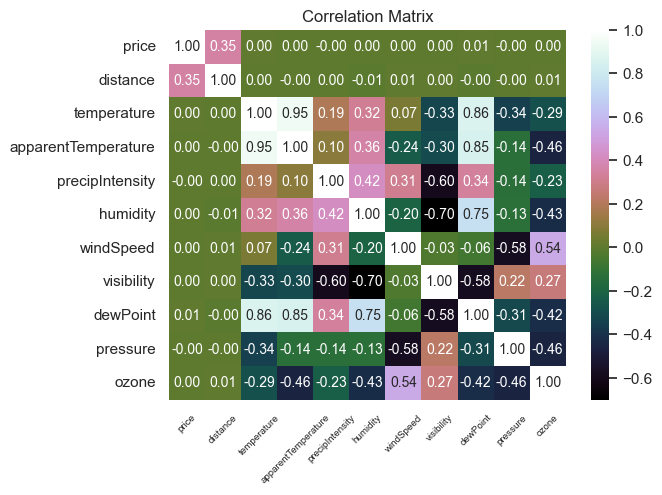

In [54]:
import seaborn as sns
#cmap where it is pink and purple
sns.heatmap(correlation_matrix, annot=True, cmap = "cubehelix", fmt = ".2f", annot_kws={'size':10})
#want text ticks to be horizontal and not vertical for seaborn heatmap
plt.xticks(rotation=45,size = 7)
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.show()

In [25]:
updated_df.columns

Index(['hour', 'is_december', 'datetime', 'is_lyft', 'price', 'distance',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'visibility', 'dewPoint',
       'pressure', 'ozone', 'Beacon Hill Source', 'Boston University Source',
       'Fenway Source', 'Financial District Source', 'Haymarket Square Source',
       'North End Source', 'North Station Source',
       'Northeastern University Source', 'South Station Source',
       'Theatre District Source', 'West End Source', 'Beacon Hill Destination',
       'Boston University Destination', 'Fenway Destination',
       'Financial District Destination', 'Haymarket Square Destination',
       'North End Destination', 'North Station Destination',
       'Northeastern University Destination', 'South Station Destination',
       'Theatre District Destination', 'West End Destination', ' Cloudy ',
       ' Foggy ', ' Rain ', 'Luxury', 'Luxury XL', 'Regular', 'XL'],
      dtype='o

In [26]:
#LASSO
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
#instantiate a lasso object
Y=updated_df['price']
X=updated_df.drop(['price','datetime','ozone'],axis=1)
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #test size is 20% of the data
# Fit a Lasso model

model = Lasso(alpha=0.05,max_iter=10000).fit(X_train,y_train) #alpha is the penalty term. It is the same as lambda in Ridge regression
model.coef_ #gives allthe penalty coefficients
X_train.columns[abs(model.coef_)<0.0001]
Xlasso=X_train.iloc[:,abs(model.coef_)>=0.0001]
print(Xlasso.columns)

import statsmodels.api as sm
Xlasso=sm.add_constant(Xlasso)
model_lasso=sm.OLS(y_train,Xlasso).fit()
model_lasso.summary()



Index(['hour', 'is_december', 'is_lyft', 'distance', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'visibility', 'dewPoint', 'pressure',
       'Beacon Hill Source', 'Boston University Source', 'Fenway Source',
       'Financial District Source', 'Haymarket Square Source',
       'North End Source', 'North Station Source',
       'Northeastern University Source', 'South Station Source',
       'Theatre District Source', 'West End Source', 'Beacon Hill Destination',
       'Boston University Destination', 'Fenway Destination',
       'Financial District Destination', 'Haymarket Square Destination',
       'North End Destination', 'North Station Destination',
       'Northeastern University Destination', 'South Station Destination',
       'Theatre District Destination', 'West End Destination', ' Cloudy ',
       ' Foggy ', ' Rain ', 'Luxury', 'Luxury XL', 'Regular', 'XL'],
      dtype='object')
Index(['distance', 'pr

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 5.029e+04
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:14:03   Log-Likelihood:            -1.1677e+05
No. Observations:               44215   AIC:                         2.335e+05
Df Residuals:                   44208   BIC:                         2.336e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7219      1.209     -1.424      0.154      -4.091       0.647
distance       2.9655      0.014    208.013      0.000       2.938       2.993
pressure       0.0026      0.001      2.195      0.028       0.000       0.005
Luxury        13.0453      0.049    267.122      0.000      12.950      13.141
Luxury XL     23.8585      0.053    447.132      0.000      23.754      23.963
Regular        2.2761      0.054     42.537      0.000       2.171       2.381
XL             8.0770      0.053    151.091      0.000       7.972       8.182
==============================================================================
Omnibus:                    32166.721   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1253208.351
Skew:                           3.075   Prob(JB):                         0.00
Kurtosis:                      28.346   Cond. No.                     7.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#live demonstration
demonstration_df = 


In [27]:
demonstration_df = updated_df.drop(['datetime','ozone'],axis=1)
demonstration_df['predicted']= model_lasso.fittedvalues
demonstration_df.head()

,hour,is_december,is_lyft,price,distance,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,...,Theatre District Destination,West End Destination,Cloudy,Foggy,Rain,Luxury,Luxury XL,Regular,XL,predicted
56245,10,0,0,8.5,2.46,41.4,41.4,0.0,0.0,0.92,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10.514563
17584,10,0,1,3.5,1.41,41.4,41.4,0.0,0.0,0.92,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.124679
57889,10,0,1,19.5,1.53,41.4,41.4,0.0,0.0,0.92,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.525831
52255,10,0,0,9.0,3.37,41.4,41.4,0.0,0.0,0.92,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.937104
21669,10,0,0,11.5,3.05,41.4,41.4,0.0,0.0,0.92,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,12.264222


In [28]:
X = pd.DataFrame(updated_df[[ ' Cloudy ', ' Foggy ', 'is_december', ' Rain ']])
Xfull = sm.add_constant(X)
y = updated_df['price']
model = sm.OLS(y, Xfull).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5610
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.691
Time:                        22:14:03   Log-Likelihood:            -2.0276e+05
No. Observations:               55269   AIC:                         4.055e+05
Df Residuals:                   55264   BIC:                         4.056e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.0263      0.122    139.281      

In [29]:
X6 = pd.DataFrame(updated_df[[ 'distance','is_december', 'hour','apparentTemperature', 'precipIntensity', ' Cloudy ', ' Foggy ', ' Rain ',  'windSpeed', 'humidity','visibility',
   'Luxury', 'Luxury XL',
       'Regular', 'XL','Beacon Hill Source', 'Boston University Source', 'Fenway Source', 'Financial District Source',
       'Haymarket Square Source', 'North End Source', 'North Station Source',
       'Northeastern University Source', 'South Station Source',
       'Theatre District Source', 'West End Source','Beacon Hill Destination', 'Boston University Destination', 'Fenway Destination', 'Financial District Destination',
       'Haymarket Square Destination', 'North End Destination',
       'North Station Destination', 'Northeastern University Destination',
       'South Station Destination', 'Theatre District Destination',
       'West End Destination']])

X6full = sm.add_constant(X6).astype(float)
y6 = updated_df['price']
model6= sm.OLS(y6, X6full).fit()
print(model6.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 1.057e+04
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:14:04   Log-Likelihood:            -1.4569e+05
No. Observations:               55269   AIC:                         2.915e+05
Df Residuals:                   55232   BIC:                         2.918e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [30]:
#cooks distance here
'''
cook_model = sm.OLS(y6, X6full.astype(float)).fit() #convert all categorical data into floats
#sort cooks_model by 

cooksD = cook_model.get_influence().summary_frame().cooks_d
#Let's add these as a column in our dataframe
df_withcooks=updated_df
df_withcooks['cooksD']=cooksD
cooksD.plot()

'''

"\ncook_model = sm.OLS(y6, X6full.astype(float)).fit() #convert all categorical data into floats\n#sort cooks_model by \n\ncooksD = cook_model.get_influence().summary_frame().cooks_d\n#Let's add these as a column in our dataframe\ndf_withcooks=updated_df\ndf_withcooks['cooksD']=cooksD\ncooksD.plot()\n\n"

In [31]:
#Add a straight red line to show the threshold
'''
plt.axhline(4/len(df_withcooks), color = 'red')
plt.show()'''

"\nplt.axhline(4/len(df_withcooks), color = 'red')\nplt.show()"

In [32]:
#scaling the regression on the surge_multiplier
'''
print(df['surge_multiplier'].unique())
updated_df['surge_multiplier']=df['surge_multiplier']
updated_df['predictedvalues']=model6.fittedvalues * updated_df['surge_multiplier']

plt.figure(figsize=(10,10))
plt.scatter(updated_df['price'], updated_df['predictedvalues'], c='crimson')
plt.plot()

'''


"\nprint(df['surge_multiplier'].unique())\nupdated_df['surge_multiplier']=df['surge_multiplier']\nupdated_df['predictedvalues']=model6.fittedvalues * updated_df['surge_multiplier']\n\nplt.figure(figsize=(10,10))\nplt.scatter(updated_df['price'], updated_df['predictedvalues'], c='crimson')\nplt.plot()\n\n"

In [33]:
#checking the r squared for weather condition
X7 = pd.DataFrame(updated_df[[ 'distance', 'apparentTemperature', 'precipIntensity', ' Cloudy ', ' Foggy ', 'is_december', ' Rain ', 'hour', 'windSpeed', 'humidity',
   'Luxury', 'Luxury XL',
       'Regular', 'XL','visibility']])
X7full = sm.add_constant(X7)
y2 = updated_df['price']
model7 = sm.OLS(y2, X7full).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 2.509e+04
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:14:04   Log-Likelihood:            -1.4596e+05
No. Observations:               55269   AIC:                         2.919e+05
Df Residuals:                   55253   BIC:                         2.921e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0141    

In [34]:
print(updated_df.columns)

Index(['hour', 'is_december', 'datetime', 'is_lyft', 'price', 'distance',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'visibility', 'dewPoint',
       'pressure', 'ozone', 'Beacon Hill Source', 'Boston University Source',
       'Fenway Source', 'Financial District Source', 'Haymarket Square Source',
       'North End Source', 'North Station Source',
       'Northeastern University Source', 'South Station Source',
       'Theatre District Source', 'West End Source', 'Beacon Hill Destination',
       'Boston University Destination', 'Fenway Destination',
       'Financial District Destination', 'Haymarket Square Destination',
       'North End Destination', 'North Station Destination',
       'Northeastern University Destination', 'South Station Destination',
       'Theatre District Destination', 'West End Destination', ' Cloudy ',
       ' Foggy ', ' Rain ', 'Luxury', 'Luxury XL', 'Regular', 'XL'],
      dtype='o

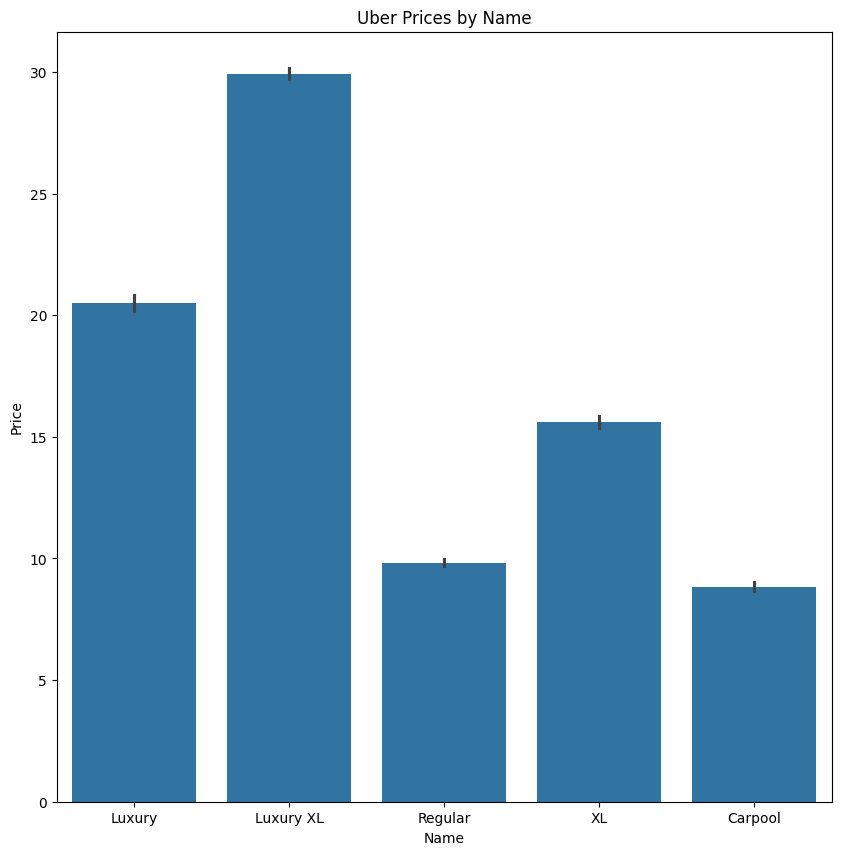

In [35]:
uber_block = pd.concat([
    updated_df[(updated_df['is_lyft'] == 0) & (updated_df["Luxury"] == 1)].sample(n=1000).sort_index(),
    updated_df[(updated_df['is_lyft'] == 0) & (updated_df["Luxury XL"] == 1)].sample(n=1000).sort_index(),
    updated_df[(updated_df['is_lyft'] == 0) & (updated_df["Regular"] == 1)].sample(n=1000).sort_index(),
    updated_df[(updated_df['is_lyft'] == 0) & (updated_df["XL"] == 1)].sample(n=1000).sort_index(),
    updated_df[(updated_df['is_lyft'] == 0) & (updated_df["Luxury"]==0) & (updated_df["Luxury"]==0) & (updated_df["Regular"]==0) & (updated_df["XL"]==0)].sample(n=1000).sort_index(),

])

lyft_block = pd.concat([
    updated_df[(updated_df['is_lyft'] == 1) & (updated_df["Luxury"] == 1)].sample(n=1000).sort_index(),
    updated_df[(updated_df['is_lyft'] == 1) & (updated_df["Luxury XL"] == 1)].sample(n=1000).sort_index(),
    updated_df[(updated_df['is_lyft'] == 1) & (updated_df["Regular"] == 1)].sample(n=1000).sort_index(),
    updated_df[(updated_df['is_lyft'] == 1) & (updated_df["XL"] == 1)].sample(n=1000).sort_index(),
    updated_df[(updated_df['is_lyft'] == 1) & (updated_df["Luxury"]==0) & (updated_df["Luxury"]==0) & (updated_df["Regular"]==0) & (updated_df["XL"]==0)].sample(n=1000).sort_index(),

])
causal_df= pd.concat([uber_block,lyft_block])

#plot uber block with price vs distance using udpated df

#graph uber_block as bar chart seperating by cab type
uber_block['price'].unique()
uber_block['distance'].unique()


uber_block['name']= uber_df['name'].replace(to_replace=['Lux Black XL','Black SUV'], value='Luxury XL',regex=False)
uber_block['name']= uber_df['name'].replace(to_replace=['Lux','Lux Black','Black'], value='Luxury',regex=False)
uber_block['name']= uber_df['name'].replace(to_replace=['UberXL'], value='XL',regex=False)
uber_block['name']= uber_df['name'].replace(to_replace=['UberX'], value='Regular',regex=False)#want to match exactly here


#Plot based on name
plt.figure(figsize=(10,10))
sns.barplot(x='name',y='price',data=uber_block)
plt.title('Uber Prices by Name')
plt.xlabel('Name')
plt.ylabel('Price')
plt.show()




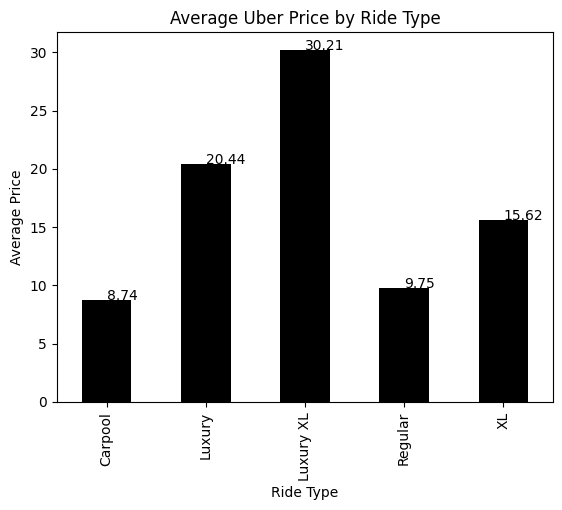

In [36]:
#using uber_df make bar chart of average price of luxury, luxury xl, regular, xl using matplotlib
#group by name and then take the mean of the price showing exact average price at top of each graph
#do the same for lyft_df

uber_df.groupby('name')['price'].mean().plot(kind='bar')
plt.title("Average Uber Price by Ride Type")
plt.ylabel("Average Price")
plt.xlabel("Ride Type")
#show average value at top of each graph
for index, value in enumerate(uber_df.groupby('name')['price'].mean()):
    plt.text(index, value, str(round(value,2)))
    #change color of text to red
#change color of bars to black and background to white
plt.gca().set_facecolor('white')
for bar in plt.gca().patches:
    bar.set_facecolor('black')
plt.show()

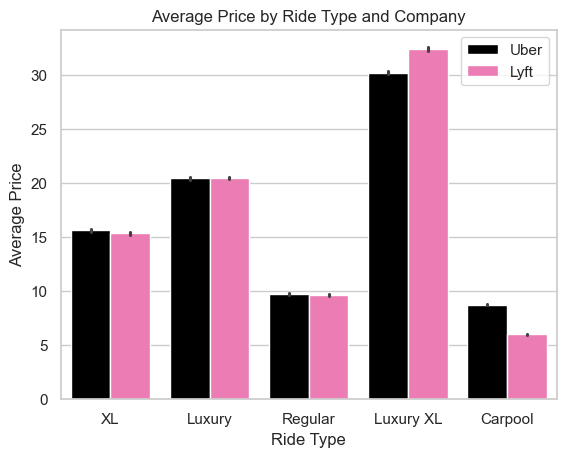

In [37]:
#get stacked column bar charts of average price chart seperating sections by carpool luxury luxry xl regular xl for uber vs lyft in price
combined_df = pd.concat([uber_df,lyft_df])

import seaborn as sns
sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x="name", y="price", hue="is_lyft", data=combined_df,palette=['black','hotpink'])
#change seaborn legend to uber and lyft
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Uber', 'Lyft'])
plt.title("Average Price by Ride Type and Company")
plt.ylabel("Average Price")
plt.xlabel("Ride Type")
#show average value at top of each graph

    #change color of text to red
#change color of bars to black and background to white
plt.gca().set_facecolor('white')
#change color of bars to black if uber and hotpink for lyft and background to white and change legend
#change color of bars to black if uber and hotpink for lyft and background to white and change legend


        

#change colors of uber bars to black and lyft bars to hotpink

    

plt.show()



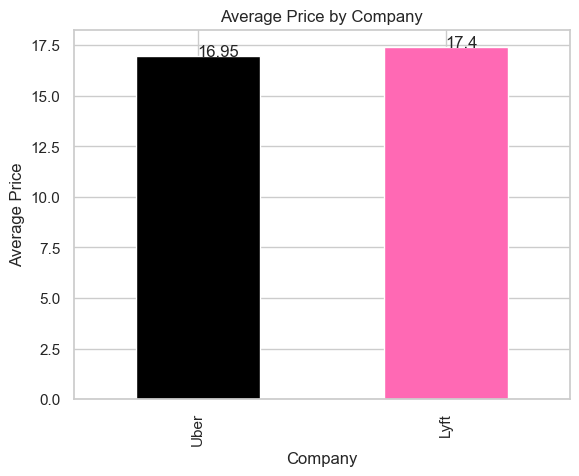

In [38]:
#print is_lyft vs price average
updated_df.groupby('is_lyft')['price'].mean().plot(kind='bar')
plt.title("Average Price by Company")
plt.ylabel("Average Price")
plt.xlabel("Company")
#show average value at top of each graph
for index, value in enumerate(updated_df.groupby('is_lyft')['price'].mean()):
    plt.text(index, value, str(round(value,2)))
    #change color of text to red
#change color of bars to black and background to white

#change text to be uber and lyft
plt.xticks([0,1],['Uber','Lyft'])
#change first bar to black and second bar to hotpink
plt.gca().patches[0].set_facecolor('black')
plt.gca().patches[1].set_facecolor('hotpink')


plt.gca().set_facecolor('white')
plt.show()

In [39]:
lyftavg_rainy= updated_df[updated_df[' Rain ']==1][updated_df['is_lyft']==1]['price'].mean()

uberavg_rainy = updated_df[updated_df[' Rain ']==1][updated_df['is_lyft']==0]['price'].mean()

print(lyftavg_rainy)
print(uberavg_rainy)


17.281529979324603
17.047027165556123


C:\Users\Josh_\AppData\Local\Temp\ipykernel_21032\2437939500.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lyftavg_rainy= updated_df[updated_df[' Rain ']==1][updated_df['is_lyft']==1]['price'].mean()
C:\Users\Josh_\AppData\Local\Temp\ipykernel_21032\2437939500.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  uberavg_rainy = updated_df[updated_df[' Rain ']==1][updated_df['is_lyft']==0]['price'].mean()


In [40]:
#cooks distance for small sample

#cooks distance here
#updated_df=updated_df.reset_index()
#first make an index for updated_df using datetime and then sort by that datetime
updated_df=updated_df.sort_values(by='datetime')





In [41]:
#make model with selected variables from x6 and y6
temp_df = updated_df.sort_index()
X8 = pd.DataFrame(temp_df[[ 'distance','is_december', 'hour','apparentTemperature', 'precipIntensity', ' Cloudy ', ' Foggy ', ' Rain ',  'windSpeed', 'humidity','visibility',  'Luxury', 'Luxury XL', 'Regular', 'XL','Beacon Hill Source', 'Boston University Source', 'Fenway Source', 'Financial District Source', 'Haymarket Square Source', 'North End Source', 'North Station Source', 'Northeastern University Source', 'South Station Source', 'Theatre District Source', 'West End Source','Beacon Hill Destination', 'Boston University Destination', 'Fenway Destination', 'Financial District Destination', 'Haymarket Square Destination', 'North End Destination', 'North Station Destination', 'Northeastern University Destination', 'South Station Destination', 'Theatre District Destination', 'West End Destination']])
y8= temp_df['price']
X8full = sm.add_constant(X8).astype(float)
cook_model = sm.OLS(y8, X8full).fit() #convert all categorical data into floats
#sort cooks_model by
cooksD = cook_model.get_influence().summary_frame().cooks_d
#Let's add these as a column in our dataframe
temp_df['cooksD']=cooksD
cooksD.plot()
plt.axhline(4/len(temp_df), color = 'red')

plt.xlabel('Index')
plt.ylabel('Cooks Distance')
plt.show()

KeyboardInterrupt: 

In [ ]:
temp_df[temp_df['cooksD'] >= 4/len(temp_df)].head(100).sort_values(by='cooksD',ascending=False)  

,hour,is_december,datetime,is_lyft,price,distance,temperature,apparentTemperature,precipIntensity,precipProbability,...,West End Destination,Cloudy,Foggy,Rain,Luxury,Luxury XL,Regular,XL,cooksD,predicted
645,10,0,11/28/18 10:41,1,52.5,3.25,34.40,29.99,0.0000,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.082962,24.406612
59528,1,1,12/15/18 1:00,1,52.5,4.23,41.77,39.35,0.0000,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.063730,27.845024
5192,17,1,12/18/18 17:05,1,38.5,3.50,30.78,20.93,0.0000,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.031144,23.889672
50776,0,0,11/30/18 0:22,1,38.5,2.67,38.60,32.72,0.0000,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.029271,22.610836
14730,10,1,12/15/18 10:35,1,42.5,4.37,46.59,45.50,0.0000,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.015366,29.075330
14731,20,1,12/17/18 20:40,1,52.5,4.37,40.40,35.63,0.0000,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.013909,39.325956
24384,21,0,11/26/18 21:14,1,26.0,1.94,45.32,41.62,0.0000,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.012640,15.246748
30951,19,1,12/1/18 19:42,1,34.0,3.16,43.99,43.99,0.0000,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.012272,22.315805
43511,16,1,12/2/18 16:17,1,38.0,1.43,46.52,43.15,0.0255,1.00,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.011765,28.573146
46280,0,0,11/29/18 0:23,1,32.5,1.76,39.41,33.81,0.0000,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.011492,21.259261
